# 使用手寫辨識資料集, 觀察 PCA 算法

# [作業目標]
- 試著模仿範例寫法, 以變更參數後的 PCA + 邏輯斯迴歸判斷手寫辨識資料集, 觀察不同 component 下正確率的變化

# [作業重點]
- 以手寫辨識資料集, 觀察變更參數後的 PCA 算法, 在取不同 component 時, PCA 解釋度與分類正確率如何變化 (In[5], Out[5])

In [14]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [15]:
# 定義 PCA 與隨後的羅吉斯迴歸函數
# penalty 改為 L1, max_iter 改為 100
logistic = SGDClassifier(loss='log', penalty='l1', max_iter=100, tol=1e-5, random_state=0)
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# 載入手寫數字辨識集
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

# 作業
* 將參數 penalty 改為 L1, max_iter 改為 100, 觀察 PCA 與羅吉斯迴歸做手寫辨識的效果

In [16]:
# 先執行 GridSearchCV 跑出最佳參數
parameters = { 'pca__n_components' : [4,10,20,30,40,50,64],
             'logistic__alpha' : np.logspace(-4,0,5)} 
search_2 = GridSearchCV(pipe, parameters, iid = False, cv = 5)
search_2.fit(X_digits, y_digits)
print('best_score:', search_2.best_score_)
print('best_parameters:', search_2.best_params_)

best_score: 0.9114754804467967
best_parameters: {'logistic__alpha': 0.01, 'pca__n_components': 20}


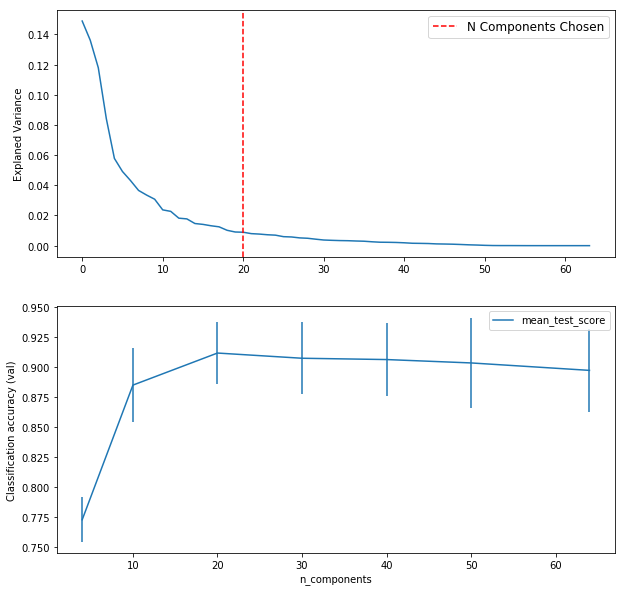

In [47]:
# 繪製不同 components 的 PCA 解釋度
pca.fit(X_digits)
fig, (ax0, ax1) = plt.subplots(nrows=2 ,figsize=(10, 10))
ax0.plot(pca.explained_variance_ratio_)
ax0.set_ylabel('Explaned Variance')
ax0.axvline(search_2.best_params_['pca__n_components'], ls="--", c="r", label = 'N Components Chosen')
ax0.legend(prop=dict(size=12))
# 繪製不同採樣點的分類正確率
all_results = pd.DataFrame(search_2.cv_results_)
all_results_group = all_results.groupby('param_pca__n_components').apply(lambda x : x.nlargest(1, 'mean_test_score'))
y_result = all_results.groupby('param_pca__n_components').apply(lambda x : x.nlargest(1, 'mean_test_score'))['mean_test_score']
y_std = all_results.groupby('param_pca__n_components').apply(lambda x : x.nlargest(1, 'mean_test_score'))['std_test_score']
x_result = all_results.groupby('param_pca__n_components').apply(lambda x : x.nlargest(1, 'mean_test_score'))['param_pca__n_components']
all_results_group.plot(x= 'param_pca__n_components', y = 'mean_test_score', yerr = 'std_test_score', ax =ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')
plt.show()

In [ ]:
### 檢視變異隨著 COMPONENTS 穩定下降
### 準確率隨著加入的 Component 數量提升, 但超過20後略微下降 ==> component 20 後, 可能為雜訊